<a href="https://colab.research.google.com/github/AngelicaDC/Enzime-structure-analysis/blob/main/Analisis_grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from scipy.stats import skew, kurtosis

## Importación de Datasets:   

In [92]:
nom= ['alncris','alncrisff','aln','alnff','sc','s']
df=pd.DataFrame()
for tec in nom:
  locals()['df_'+tec]= pd.read_csv('/content/drive/MyDrive/Borradores Maestria/RESULTADOS_pruebas/prueba_'+tec+'/dfd_2'+tec+'.txt', sep='\t')
  #locals()['cn_'+tec]= (globals()['df_'+tec].groupby(by=['circuito','n'])['circuito'].count()).to_frame().rename(columns={'circuito': 'cuenta'}).reset_index()
  locals()['df_'+tec]["tecnica"] = tec
  df=pd.concat([df,locals()['df_'+tec]])
  
df.reset_index(inplace=True, drop=True)
df['circuito'] = df['circuito'].astype('str')
df['n'] = df['n'].astype('str')
df['circuito_hebras'] = df[["circuito","n"]].apply("_".join, axis=1)
df.head()

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
0,1uozA01,alncris,0,8,8,0.809905,118.270951,0.407674,40.612161,44.826051,13.071854,1.111382,3.644605,0.424623,5.174254,0.136462,11.288864,3.422953,9.531879,9.531879,285.434813,59.890564,0.030427,32.329666,14.167689,0_8
1,1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,3.804157,0.007278,5.233930,0.099638,8.665694,4.020067,8.703539,8.703539,237.980640,54.685948,0.033810,30.052826,7.114144,1_8
2,1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,3.799256,0.008554,5.138146,0.069556,7.625307,4.306424,8.213122,8.213122,211.917289,51.604566,0.034668,25.652855,5.161767,1_8
3,1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,3.798974,0.009561,5.240588,0.066208,7.519750,4.136397,8.285630,8.285630,215.675541,52.060146,0.033957,26.137985,6.786186,1_8
4,1a5aA00,alncris,0,8,8,0.701196,139.592458,0.742784,42.782220,33.575721,9.390412,0.852691,3.795976,0.011494,5.080358,0.081251,7.107062,3.284685,7.967067,7.967067,199.409950,50.058559,0.034940,23.049655,9.704495,0_8


In [38]:
from google.colab import files
files.upload()

Saving dominios-tim.csv to dominios-tim.csv


{'dominios-tim.csv': b'id_barril,id_dominio,longitud,resolucion\r\n4beuA02,3.20.20.10,217,1.15\r\n4beqA02,3.20.20.10,217,1.5\r\n4bf5A02,3.20.20.10,218,1.45\r\n4bf5B02,3.20.20.10,218,1.45\r\n4dzaA02,3.20.20.10,216,1.74\r\n4dyjA02,3.20.20.10,216,2.45\r\n4dyjB02,3.20.20.10,216,2.45\r\n4fs9A02,3.20.20.10,217,3.1\r\n4fs9B02,3.20.20.10,217,3.1\r\n5fagA02,3.20.20.10,220,1.51\r\n5fagD02,3.20.20.10,220,1.51\r\n5fagB02,3.20.20.10,221,1.51\r\n5fagC02,3.20.20.10,221,1.51\r\n5fajA02,3.20.20.10,220,1.64\r\n5fajB02,3.20.20.10,220,1.64\r\n5fajC02,3.20.20.10,220,1.64\r\n5fajD02,3.20.20.10,220,1.64\r\n5facA02,3.20.20.10,220,2.8\r\n5facB02,3.20.20.10,220,2.8\r\n5facC02,3.20.20.10,220,2.8\r\n5facD02,3.20.20.10,220,2.8\r\n1vfsA02,3.20.20.10,215,1.9\r\n1vfsB02,3.20.20.10,215,1.9\r\n1vfhA02,3.20.20.10,215,2\r\n1vftA02,3.20.20.10,215,2.3\r\n1vftB02,3.20.20.10,215,2.3\r\n1xfcB02,3.20.20.10,216,1.9\r\n1xfcA02,3.20.20.10,211,1.9\r\n2dy3C02,3.20.20.10,208,2.1\r\n2dy3D02,3.20.20.10,206,2.1\r\n2dy3B02,3.20.20.10,20

In [6]:
df_1_8_old = pd.read_excel('Barriles_old.xlsx')
df_1_8_old.head()

,id_barril,tecnica,circuito,nraw,n,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,e,area_elip
0,1a0cA00,alncris,1,8,8,38.213587,11.743714,1.105803,3.804157,0.007278,4.534835,0.111427,7.508218,4.020067,7.541008,7.541008,178.652313,47.381549,0.039023,30.052826,7.114144,0.821656,119.611355
1,1a3wA02,alncris,1,8,8,35.175785,10.625739,1.055893,3.799256,0.008554,4.395483,0.191093,6.523153,4.306424,7.026005,7.026005,155.083932,44.145692,0.040525,25.652855,5.161767,0.350654,121.090125
2,1a53A00,alncris,1,8,8,34.270369,8.478744,0.976213,3.798974,0.009561,4.629148,0.145794,6.642391,4.136397,7.318912,7.318912,168.284060,45.986083,0.038442,26.137985,6.786186,0.203293,117.544935
3,1a5kC02,alncris,1,8,8,45.274504,18.382924,1.191304,3.797641,0.007422,4.517038,0.182015,9.607080,3.719187,8.386676,8.386676,220.968085,52.695036,0.036032,32.494040,13.612916,0.767183,143.139741
4,1aa1B02,alncris,1,8,8,31.701630,6.741634,0.785980,3.803051,0.014556,4.575379,0.111970,5.944683,3.499919,7.026385,7.026385,155.100684,44.148077,0.038514,25.199231,13.277511,0.572608,126.556865


In [27]:
df_desc = pd.read_excel('barriles.xlsx')
df_desc.head()

,Unnamed: 0,calculo,circuito_chim,n_chim,concuerda,desc
0,1iv8A01,"0_7, 1_8",1,8,yes,Todas las hebras del barril tienen puentes de ...
1,2i5gA00,"0_(4,5), 1_8",1,8,yes,HMD. Todas las hebras del barril tienen puente...
2,2pajA02,"0_4, 1_8",1,8,yes,HMD. Todas las hebras del barril tienen puente...
3,3a24A02,"1_(7,8)",1,8,yes,Es un barril de 8 hebras pero la séptima hebra...
4,1tv8B00,0_12,0,Nan,NaN,De la hebra 1 a la 6 continuas angulos interhe...


In [37]:
df_familias = pd.read_csv('superfamily-tim.csv', sep="|",engine='python')
df_familias = df_familias[["id_dominio","s35_reps","total_reps","dominio"]]
df_familias.head()

,id_dominio,s35_reps,total_reps,dominio
0,3.20.20.10,32,280,'Alanine racemase'
1,3.20.20.20,13,209,'Dihydropteroate synthase-like'
2,3.20.20.30,15,67,'Luciferase-like domain'
3,3.20.20.40,4,63,"'1, 4-beta cellobiohydrolase'"
4,3.20.20.60,25,639,'Phosphoenolpyruvate-binding domains'


In [62]:
df_ids = pd.read_csv('dominios-tim.csv')
df_ids.head()

,id_barril,id_dominio,longitud,resolucion
0,4beuA02,3.20.20.10,217,1.15
1,4beqA02,3.20.20.10,217,1.50
2,4bf5A02,3.20.20.10,218,1.45
3,4bf5B02,3.20.20.10,218,1.45
4,4dzaA02,3.20.20.10,216,1.74


### Uniendo dataframes para saber la superfamilia de cada barril Tim

In [93]:
df_merged=pd.merge(df_ids,df_familias[['id_dominio','dominio']],on='id_dominio', how='left')
df_merged.rename(columns={"id_barril":"barril"}, inplace=True)
df=pd.merge(df,df_merged[["barril","dominio"]],on="barril",how="left")
df.head()

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras,dominio
0,1uozA01,alncris,0,8,8,0.809905,118.270951,0.407674,40.612161,44.826051,13.071854,1.111382,3.644605,0.424623,5.174254,0.136462,11.288864,3.422953,9.531879,9.531879,285.434813,59.890564,0.030427,32.329666,14.167689,0_8,"'1, 4-beta cellobiohydrolase'"
1,1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,3.804157,0.007278,5.233930,0.099638,8.665694,4.020067,8.703539,8.703539,237.980640,54.685948,0.033810,30.052826,7.114144,1_8,'Divalent-metal-dependent TIM barrel enzymes'
2,1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,3.799256,0.008554,5.138146,0.069556,7.625307,4.306424,8.213122,8.213122,211.917289,51.604566,0.034668,25.652855,5.161767,1_8,'Phosphoenolpyruvate-binding domains'
3,1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,3.798974,0.009561,5.240588,0.066208,7.519750,4.136397,8.285630,8.285630,215.675541,52.060146,0.033957,26.137985,6.786186,1_8,'Aldolase class I'
4,1a5aA00,alncris,0,8,8,0.701196,139.592458,0.742784,42.782220,33.575721,9.390412,0.852691,3.795976,0.011494,5.080358,0.081251,7.107062,3.284685,7.967067,7.967067,199.409950,50.058559,0.034940,23.049655,9.704495,0_8,'Aldolase class I'


## Contando cuantos barriles hay de cada tipo por cada técnica

In [38]:
df.loc[df['tecnica']=="sc","circuito_hebras"].value_counts()

1_8     469
0_8     141
1_9     102
0_7      67
0_9      60
0_10     32
0_5      26
0_6      25
0_4       8
1_10      8
0_11      8
1_7       3
0_3       3
0_12      3
1_11      2
1_12      1
0_13      1
Name: circuito_hebras, dtype: int64

In [83]:
df_bars1=df[["circuito_hebras","tecnica"]]#.set_index(["tecnica"])
#df_bars1= df_bars1.groupby(by=["tecnica","cn"])["count"].sum().reset_index()
print(df_bars1['circuito_hebras'].unique())

['0_8' '1_8' '0_7' '0_5' '0_6' '0_4' '1_7' '0_3' '1_6' '0_10' '0_9' '0_11'
 '1_10' '1_9' '1_11' '0_12' '0_13' '1_12' '1_2']


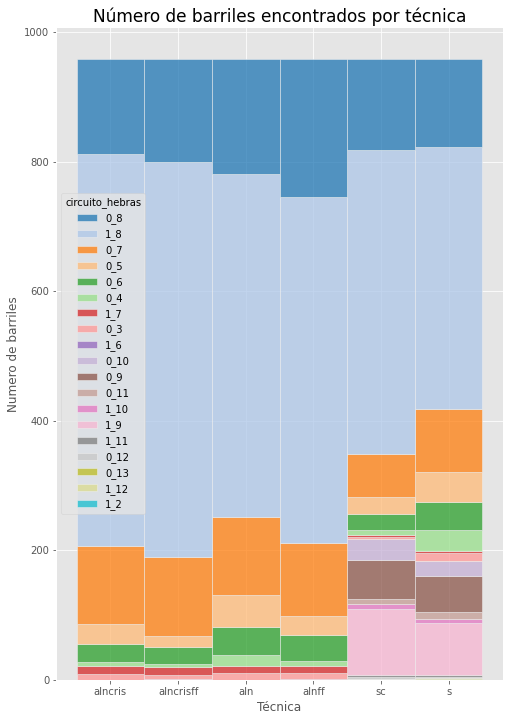

In [21]:
#sns.displot(data=df_bars1, x="tecnica", hue='cn',stat="count", ax=ax, multiple="stack",);
#sns.palplot(sns.color_palette("deep", 18))
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(8, 12))
  ax = fig.add_subplot()
  ax= sns.histplot(data=df_bars1, x="tecnica",hue='circuito_hebras', multiple="stack", palette="tab20",stat="count",
                   )#hue_order=["1_12","1_11","1_10","1_9","1_8","1_7","1_2","0_13","0_12","0_11","0_10","0_9","0_8","0_7","0_6","0_5","0_4","0_3"]
  ax.set_title('Número de barriles encontrados por técnica', size=17)
  ax.set(ylabel='Numero de barriles', xlabel='Técnica')


In [4]:
df.loc[(df['tecnica']=="aln") & (df["circuito_hebras"]=="1_7")]

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
2178,1xw8A00,aln,1,7,7,0.665051,116.300619,0.517494,38.840545,38.091217,12.070537,0.821545,3.792982,0.011160,5.165152,0.142958,7.471964,3.342855,7.562905,7.562905,179.691334,47.519132,0.038755,33.892209,11.422591,1_7
2252,2g95B02,aln,1,7,7,0.401329,133.322837,0.420515,40.990637,41.531212,23.386190,0.885043,3.797762,0.011716,5.190958,0.128474,8.474283,3.980154,7.990931,7.990931,200.606355,50.208503,0.037543,37.577127,21.393480,1_7
2267,2i14A02,aln,1,7,7,0.809785,123.768020,0.273012,41.543015,32.725190,13.593875,0.873519,3.788702,0.011603,5.294890,0.151568,6.286542,3.675957,7.252981,7.252981,165.265784,45.571823,0.037811,32.304251,19.538499,1_7
2382,2x5eA00,aln,1,7,7,0.588326,110.730520,0.258915,37.618232,41.890282,12.961389,0.853503,3.809654,0.013848,5.275858,0.133137,8.695012,3.964291,8.167119,8.167119,209.549965,51.315519,0.036901,37.006591,12.895364,1_7
2410,3a24A02,aln,1,8,7,0.636861,116.150981,0.521064,38.689432,34.541965,12.563516,0.970435,3.798519,0.010425,5.339569,0.122160,6.773381,4.254485,7.470125,7.470125,175.309584,46.936182,0.037798,31.395493,16.218072,1_7
2424,3b0xA05,aln,1,7,7,0.832705,106.660888,0.323137,39.013772,41.925175,12.297109,1.221786,3.796108,0.009645,5.244485,0.117565,8.684784,2.895285,8.122991,8.122991,207.291679,51.038261,0.036975,34.795065,18.095541,1_7
2466,3dcpA00,aln,1,7,7,0.526257,93.378392,0.739524,34.424197,42.206908,7.909615,1.316237,3.889450,0.249895,5.261933,0.063872,8.589056,2.693110,8.186264,8.186264,210.533596,51.435816,0.037629,34.399191,12.821612,1_7
2511,3hftA00,aln,1,7,7,0.583683,141.944080,0.485750,42.577729,36.584508,16.328039,0.713382,3.802248,0.008797,5.282440,0.177507,7.218385,2.289199,7.581012,7.581012,180.552811,47.632904,0.038202,36.579743,19.750437,1_7
2752,4hd5A02,aln,1,7,7,0.809671,123.697892,0.121972,41.529124,44.452219,14.009975,1.121761,3.796376,0.011440,5.239004,0.088084,9.477043,3.314385,8.457610,8.457610,224.721813,53.140734,0.035713,40.110280,15.792055,1_7
2839,4wcjA00,aln,1,7,7,0.742308,117.279996,0.265918,39.544831,41.662986,10.108496,1.036237,3.805725,0.008738,5.188008,0.069042,8.490988,3.102181,8.002714,8.002714,201.198379,50.282536,0.037587,36.018044,16.255632,1_7


#### Encontrar las intersecciones de grupos de barriles entrer técnicas

In [76]:
grupo='0_3'
pd.Series(np.intersect1d(df.loc[(df['tecnica']=="alnff") & (df["circuito_hebras"]==grupo), "barril"],df.loc[(df['tecnica']=="alncrisff") & (df["circuito_hebras"]==grupo), "barril"])).shape
#setdiff1d

(6,)

#### Encontrar la diferencia entre series de los barriles

In [5]:
grupo='0_7'
pd.Series(np.setdiff1d(df.loc[(df['tecnica']=="alnff") & (df["circuito_hebras"]==grupo), "barril"],df.loc[(df['tecnica']=="alncrisff") & (df["circuito_hebras"]==grupo), "barril"])),\
pd.Series(np.setdiff1d(df.loc[(df['tecnica']=="alncrisff") & (df["circuito_hebras"]==grupo), "barril"],df.loc[(df['tecnica']=="alnff") & (df["circuito_hebras"]==grupo), "barril"]))

(0    1ypxA00
 1    2ffiA00
 2    4k36B00
 dtype: object, 0     1djxA02
 1     1e9iC02
 2     1j5sA01
 3     1uhvA02
 4     2q01A01
 5     3ciwA00
 6     3fokA00
 7     3n2oA02
 8     3qy7A00
 9     4acyA00
 10    4by3A00
 11    4i3gA01
 12    4oifB01
 dtype: object)

### Barriles nuevos con alncrisff

In [11]:
alncris_18 = df_alncris[(df_alncris['circuito']==1) & (df_alncris['n']==8)]['barril']
alncrisff_18 = df_alncrisff[(df_alncrisff['circuito']==1) & (df_alncrisff['n']==8)]['barril']
aln_18 = df_aln[(df_aln['circuito']==1) & (df_aln['n']==8)]['barril']
alnff_18 = df_alnff[(df_alnff['circuito']==1) & (df_alnff['n']==8)]['barril']
len(alncrisff_18)

610

In [12]:
print(f'Hay {len(alncrisff_18[~alncrisff_18.isin(alncris_18)])} barriles que encontramos con alncrisff pero no alncris \n{alncrisff_18[~alncrisff_18.isin(alncris_18)]}\n\
Hay {len(alncris_18[~alncris_18.isin(alncrisff_18)])} barriles que encontramos con alncris pero no alncrisff\n\
Hay {len(alnff_18[~alnff_18.isin(aln_18)])} barriles que encontramos con alnff pero no aln\n\
Hay {len(aln_18[~aln_18.isin(alnff_18)])} barriles que encontramos con aln pero no alnff\n\
Hay {len(alnff_18[~alnff_18.isin(alncrisff_18)])} barriles que encontramos con alnff pero no alncrisff\n\
Hay {len(alncrisff_18[~alncrisff_18.isin(alnff_18)])} barriles que encontramos con alncrisff pero no alnff')
#Hay que revisar los cuatro barriles nuevos que se encontraron con alncrisff
#alnff no sirve de mucho ya que alncris y alncrisff tienen todo sus barriles y mas


Hay 4 barriles que encontramos con alncrisff pero no alncris 
108    1iv8A01
350    2i5gA00
396    2pajA02
492    3a24A02
Name: barril, dtype: object
Hay 0 barriles que encontramos con alncris pero no alncrisff
Hay 5 barriles que encontramos con alnff pero no aln
Hay 0 barriles que encontramos con aln pero no alnff
Hay 0 barriles que encontramos con alnff pero no alncrisff
Hay 75 barriles que encontramos con alncrisff pero no alnff


## Dataframes de barriles por tipo


In [84]:
tipos=list(df_bars1['circuito_hebras'].unique())
#"1_8","1_9","1_7","1_10","0_11","0_10","0_9","0_8","0_7","0_6","0_5","0_4","0_3"
for tipo in tipos:
  locals()['df_'+tipo]= df.loc[df['circuito_hebras']==tipo]

#### Barriles con numero de herbas discordante
* El unico 1_2 encontrado con stride es 1_8 con alncris y aln.
* El unico 0_13 encontrado con sc y stride es 1_8 con alncris.
* De los tres 0_12, 1tv8B00	es abierto y el numero de hebras no es claro, con alncris le falta una hebra al menos. **editar aparte**       
2nt0A01	es 1_8 con alncris y aln.  
3e38A01 es abierto y el numero de hebras no es claro y tampoco la forma del barril. **editar aparte**   
* El único 1_12 encontrado con sc y strice es 1_8 con alncris y aln.
* De los once 0_11, seis son 1_8 con alncris.   
2anuA00 es abierto y el número de hebras no es claro, se parece a 3e38A01. **editar aparte**  
1djxA02 es 1_8, con alncris le falta una hebra. **editar aparte**   
2dskA00 es 1_8, con alncris 0_8 porque a una hebra le hacen falta residuos. **editar aparte**   
3rf9B02 es abierto y el número de hebras no es claro. **editar aparte**   
3e38A01 (lo mismo que con 0_12).
* De los dos 1_11 encontrados con sc y stride ambos son 1_8 con alncris.
* De los veintidos 0_3, siete son 1_8 y 3 son 0_8 con alguna otra técnica.  
2anuA00 (lo mismo que con 0_12) **editar aparte**   
2hnhA01	es UNK_7 HMD (Unir anotaciones sc y alncris) **editar aparte**   
2hpiA01 es UNK_7 HMD (Unir anotaciones sc y alncris) **editar aparte**   
2pe4A00 es 0_8 (Unir anotaciones sc y alncris) **editar aparte**   
2r8cA02 es UNK_UNK HMD parece de 8 hebras con una hoja beta extra **editar aparte**   
2x41A01 es 1_8 (Unir anotaciones sc y alncris) **editar aparte**   
2yb1A01 es 1_7 HDM (usar sc) **editar aparte**   
3e0fA01 es UNK_7 HMD (usar sc) **editar aparte**   
3f2bA02 es UNK_7 HMD (añadir la hebra que falta a alncris) **editar aparte**   
3kzsA01 no usar parece que está incompleta la estructura   
3ooqA02 es UNK_8 HMD (usar sc)
3zyzA01 es 1_8 (añadir la hebra que falta a alncrisff) **editar aparte**   
4dziB00 es UNK_8 HMD (añadir las dos hebras que faltan a alncrisff) **editar aparte**   
4njhA00 es 0_UNK (usar sc)
* De los cuarenta y siete 0_4, 21 son 1_8 y 13 son 0_8 con alguna otra técnica   
1j5sA01 es UNK_8 HMD (añadir hebra que falta a alncris) **editar aparte**   
1ofdA02 parecen varias hojas beta, 6 hebras pero no forman un barril. No usar.   
1t7lB01 es UNK_8 (añadir hebra que falta a alncrisff) **editar aparte** 






#####PENDIENTE SABER SI SON 0_8 U OTRO TIPO


* De los 290 0_8 encontrados con alncris|aln|sc|stride, 107 son 1_8 con otra técnica.









In [24]:
df.loc[df['circuito_hebras']=="0_4"].groupby("barril").first().shape

(47, 25)

In [ ]:
#Obteniendo los índices ("barriles") que se encuentran en el grupo 0_3 
list(df.loc[df['circuito_hebras']=="0_4"].groupby("barril").first().index)
#Obteniendo en qué otros grupos se encontraron esos barriles con las demás técnicas
df[df['barril'].isin(list(df.loc[df['circuito_hebras']=="0_4"].groupby("barril").first().index))].sort_values(by="barril").head(100).tail(60)

In [85]:
df[df['barril']=='2plcA00']#, df_1_8_old[df_1_8_old['id_barril']=='4uwmA00']

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras,dominio_x,dominio_y
401,2plcA00,alncris,0,7,5,0.884742,174.884653,2.672517e-07,52.018969,29.848703,14.877538,1.385741,3.800092,0.008902,5.239538,0.173999,3.955995,1.388514,5.138704,5.138704,82.957763,32.287428,0.050808,28.485717,12.005521,0_5,'Phosphatidylinositol (PI) phosphodiesterase','Phosphatidylinositol (PI) phosphodiesterase'
1360,2plcA00,alncrisff,0,7,5,0.884742,174.884653,2.672517e-07,52.018969,29.848703,14.877538,1.385741,3.800092,0.008902,5.239538,0.173999,3.955995,1.388514,5.138704,5.138704,82.957763,32.287428,0.050808,28.485717,12.005521,0_5,'Phosphatidylinositol (PI) phosphodiesterase','Phosphatidylinositol (PI) phosphodiesterase'
2319,2plcA00,aln,0,7,5,0.922143,148.177203,2.409088e-01,50.489081,26.809159,7.050316,0.897804,3.801792,0.009975,5.218269,0.112478,3.468081,2.150675,4.973508,4.973508,77.709765,31.249475,0.048973,25.335564,5.617103,0_5,'Phosphatidylinositol (PI) phosphodiesterase','Phosphatidylinositol (PI) phosphodiesterase'
3278,2plcA00,alnff,0,7,5,0.922143,148.177203,2.409088e-01,50.489081,26.809159,7.050316,0.897804,3.801792,0.009975,5.218269,0.112478,3.468081,2.150675,4.973508,4.973508,77.709765,31.249475,0.048973,25.335564,5.617103,0_5,'Phosphatidylinositol (PI) phosphodiesterase','Phosphatidylinositol (PI) phosphodiesterase'
4237,2plcA00,sc,0,12,10,0.841039,212.195511,2.410478e+00,55.300820,45.189100,22.875294,1.193015,3.804222,0.007166,5.339423,0.081256,14.128474,6.335192,12.258437,12.258437,472.084833,77.022029,0.024695,36.935530,21.038039,0_10,'Phosphatidylinositol (PI) phosphodiesterase','Phosphatidylinositol (PI) phosphodiesterase'
5196,2plcA00,s,0,12,9,0.854081,213.624425,2.355401e+00,55.972761,43.382404,20.296617,0.987976,3.878058,0.219201,5.271706,0.079876,11.562295,3.741274,10.603841,10.603841,353.245199,66.625897,0.029057,29.730116,12.202412,0_9,'Phosphatidylinositol (PI) phosphodiesterase','Phosphatidylinositol (PI) phosphodiesterase'


In [86]:
df_ordenado= pd.concat([df_1_8,df_1_7,df_1_6,df_0_8,df_1_9,df_1_10]).reset_index(drop=True).groupby("barril").first().reset_index()
df_ordenado[['tecnica','circuito_hebras']].value_counts()

tecnica    circuito_hebras
alncris    1_8                606
           0_8                143
sc         1_8                 51
           0_8                 27
           1_9                 19
alncrisff  0_8                 11
alncris    1_7                  9
alncrisff  1_8                  4
s          1_8                  3
sc         1_10                 2
alncrisff  1_6                  2
s          1_9                  1
alncrisff  1_7                  1
dtype: int64

In [87]:
df_ordenado[df_ordenado['circuito_hebras']=="1_10"].reset_index()

,index,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras,dominio_x,dominio_y
0,26,1c3fA00,sc,1,14,10,0.924315,206.365676,2.389300,59.834567,44.432658,21.849277,1.052966,3.824394,0.108016,5.126650,0.253646,13.142252,3.460447,11.616579,11.616579,423.941946,72.989120,0.026193,28.08800,11.729719,1_10,'Glycosidases','Glycosidases'
1,832,4uwmA00,sc,1,12,10,0.904400,189.095717,1.914631,55.405349,45.793158,19.218686,0.899929,3.537976,0.455946,5.267926,0.116773,15.307717,0.827723,12.224704,12.224704,469.490268,76.810082,0.023022,29.58074,16.522976,1_10,'Luciferase-like domain','Luciferase-like domain'


In [52]:
pd.Series(np.intersect1d(df_8['barril'], df_1_9['barril']))  

0     1ctnA02
1     1djqA01
2     1e5nA00
3     1e6pA01
4     1hjxA01
       ...   
80    4wiwA01
81    5ay7B00
82    5dmmA00
83    5dqpB00
84    5gjnA02
Length: 85, dtype: object

In [105]:
pd.Series(np.intersect1d(df_1_9["barril"], df_0_8["barril"])).shape

(10,)

## Barriles obtenidos con criterios viejos vs los nuevos

In [83]:
print(f"Hay {len(df_1_8_old)} barriles 1_8 encontrados con los criterios viejos y {len(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8'])} con los nuevos")
print('interseccion entre barriles 1_8 sacados con los viejos criterios y con los nuevos es :',\
      len(pd.Series(np.intersect1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"]))))

Hay 604 barriles 1_8 encontrados con los criterios viejos y 664 con los nuevos
interseccion entre barriles 1_8 sacados con los viejos criterios y con los nuevos es : 579


In [78]:
print('barriles de 1_8 que solo estan con los viejos criterios : ',\
len(pd.Series(np.setdiff1d(df_1_8_old["id_barril"], df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril']))))
print('barriles de 1_8 que solo estan con los nuevos criterios : ',\
len(pd.Series(np.setdiff1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"]))))

barriles de 1_8 que solo estan con los viejos criterios :  25
barriles de 1_8 que solo estan con los nuevos criterios :  85


In [88]:
#Como se anotarion los barriles 1_8 que solo estan con los viejos criterios, usando los nuevos?
#df.loc[df['barril'].isin(pd.Series(np.setdiff1d(df_1_8_old["id_barril"], df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'])))].groupby('barril').first()

#Cuales son los barriles 1_8 que solo estan con los nuevos criterios?
df.loc[df['barril'].isin(pd.Series(np.setdiff1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"])).to_list())].groupby("barril").first().head(90).tail(10)
#pd.Series(np.setdiff1d(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'], df_1_8_old["id_barril"])).to_list()

,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras,dominio_x,dominio_y
barril,,,,,,,,,,,,,,,,,,,,,,,,,,,
4f3hA00,alncris,0,7,7,0.841933,176.598909,0.067631,50.477725,32.340636,10.058199,0.982876,3.804280,0.007142,5.229912,0.067276,6.093097,4.343170,7.133368,7.133368,159.859759,44.820274,0.038363,25.182509,15.495944,0_7,'EAL domain','EAL domain'
4hd5A02,alncris,1,7,7,0.809671,123.697892,0.121972,41.529124,44.978881,13.643115,1.137012,3.796987,0.010691,5.231695,0.082215,9.637874,3.327352,8.523031,8.523031,228.211736,53.551781,0.035452,40.360321,15.628250,1_7,'Glycoside hydrolase/deacetylase','Glycoside hydrolase/deacetylase'
4i3gA01,alncris,0,7,6,0.814101,147.543244,0.083119,45.447640,36.469640,7.996163,1.142671,3.741857,0.092819,5.204449,0.136368,6.168313,2.987812,6.471812,6.471812,131.583561,40.663593,0.043985,33.872031,10.419493,0_6,"'Glycoside hydrolase, family 3, N-terminal dom...","'Glycoside hydrolase, family 3, N-terminal dom..."
4if2A00,alncris,0,7,6,0.807608,133.607261,0.596828,43.121092,40.646796,22.707177,0.996339,3.919965,0.325277,5.272190,0.103665,6.928053,3.139327,6.948616,6.948616,151.686363,43.659444,0.044375,31.618691,12.206123,0_6,'Metal-dependent hydrolases','Metal-dependent hydrolases'
4jcmA01,alncris,1,8,8,0.631497,127.436354,0.555024,40.503442,35.504061,13.703476,0.733633,3.798768,0.010922,5.198568,0.058365,7.810233,2.501140,8.343532,8.343532,218.700507,52.423960,0.034259,32.859441,14.602247,1_8,'Glycosidases','Glycosidases'
4l6dA00,alncris,1,8,8,0.617762,129.735709,1.069818,40.814480,45.426135,16.793547,1.112682,3.795121,0.009689,5.154109,0.103739,11.027529,3.662633,9.595179,9.595179,289.238464,60.288289,0.031471,36.236030,11.286714,1_8,'Metal-dependent hydrolases','Metal-dependent hydrolases'
4mupB00,alncris,1,8,8,0.724639,132.545110,0.421023,41.873496,41.349221,16.556040,1.063531,3.797049,0.010262,5.204559,0.102098,9.650112,3.561231,9.058361,9.058361,257.779956,56.915362,0.033086,33.867967,16.034165,1_8,'Metal-dependent hydrolases','Metal-dependent hydrolases'
4v1xA02,alncris,1,8,8,0.796997,122.174341,0.840886,41.053086,45.255662,10.216276,1.257523,3.786003,0.008252,5.303082,0.093496,11.306111,3.993924,9.842836,9.842836,304.361972,61.844364,0.030608,33.029937,19.614702,1_8,'Metal-dependent hydrolases','Metal-dependent hydrolases'
4wcjA00,alncris,1,7,7,0.749443,112.641034,0.067050,38.823748,42.078491,9.766348,1.060722,3.805638,0.008790,5.189447,0.067928,8.618374,3.126614,8.057136,8.057136,203.944136,50.624476,0.037392,36.182478,15.885482,1_7,'Glycoside hydrolase/deacetylase','Glycoside hydrolase/deacetylase'


In [24]:
df[df['barril']=='1gjwA01']

,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras
84,1gjwA01,alncris,0,7,6,0.745099,180.504264,0.231522,49.092780,25.487323,7.970420,0.795840,3.807962,0.015828,5.153897,0.084897,3.871178,3.694613,5.709548,5.709548,102.412569,35.874145,0.041231,19.947834,4.979957,0_6
1043,1gjwA01,alncrisff,0,7,7,0.329102,122.539161,0.339599,39.265382,34.645757,19.442469,0.846082,3.810714,0.016180,5.160233,0.076968,6.550279,3.204538,7.228258,7.228258,164.141031,45.416484,0.039242,28.015927,19.373946,0_7
2001,1gjwA01,aln,0,7,6,0.745099,180.504264,0.231522,49.092780,25.487323,7.970420,0.795840,3.807962,0.015828,5.153897,0.084897,3.871178,3.694613,5.709548,5.709548,102.412569,35.874145,0.041231,19.947834,4.979957,0_6
2960,1gjwA01,alnff,0,7,7,0.329102,122.539161,0.339599,39.265382,34.645757,19.442469,0.846082,3.810714,0.016180,5.160233,0.076968,6.550279,3.204538,7.228258,7.228258,164.141031,45.416484,0.039242,28.015927,19.373946,0_7
3919,1gjwA01,sc,1,17,8,0.347683,131.110436,0.543041,40.622005,37.695777,15.542936,0.906715,3.812205,0.015562,5.207497,0.107200,8.444874,2.849633,8.598753,8.598753,232.284815,54.027559,0.034140,31.229471,18.636258,1_8
4878,1gjwA01,s,1,17,8,0.347683,131.110436,0.543041,40.622005,37.695777,15.542936,0.906715,3.812205,0.015562,5.207497,0.107200,8.444874,2.849633,8.598753,8.598753,232.284815,54.027559,0.034140,31.229471,18.636258,1_8


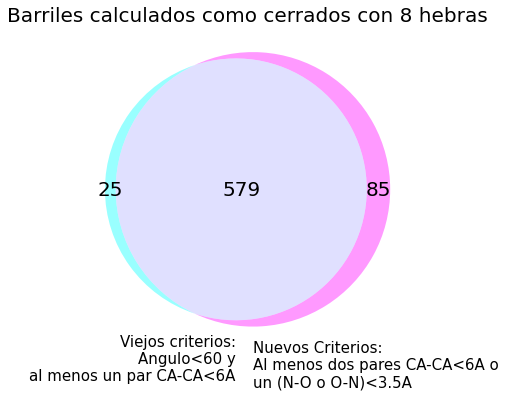

In [140]:
with plt.style.context('ggplot'):
  fig = plt.figure(figsize=(6, 6))
  out= venn2([set(df_1_8_old["id_barril"].to_list()), 
       set(df_ordenado.loc[df_ordenado['circuito_hebras']=='1_8', 'barril'].to_list())],
       set_labels=('Viejos criterios:\nAngulo<60 y\nal menos un par CA-CA<6A', 'Nuevos Criterios:\nAl menos dos pares CA-CA<6A o\nun (N-O o O-N)<3.5A'),
        alpha = 0.4,
        set_colors=("aqua", "magenta"))
  for text in out.set_labels:
   text.set_fontsize(15)
  for text in out.subset_labels:
   text.set_fontsize(20)
  plt.title("Barriles calculados como cerrados con 8 hebras", fontsize=20)
  plt.show()

De los 290 barriles 0_8, cuántos fueron encontrados como 1_8 con una técnica diferente: 107   
Mientras que 183 conservaron su anotación 0_8

In [33]:
df_0_8.groupby("barril")["barril"].first()[~df_0_8.groupby("barril")['barril'].first().isin(df_1_8.groupby("barril")['barril'].first())] #.groupby("barril").first()

barril
1aw5A00    1aw5A00
1bqgA02    1bqgA02
1ccwB01    1ccwB01
1dpmA00    1dpmA00
1dysA00    1dysA00
            ...   
5jmuA00    5jmuA00
5k9xA00    5k9xA00
5kinC00    5kinC00
5swuA00    5swuA00
5tnvA00    5tnvA00
Name: barril, Length: 183, dtype: object

## Barriles de 8 hebras

In [89]:
df_8= df_ordenado[df_ordenado['n']=="8"].reset_index()
df_8.head(3)

,index,barril,tecnica,circuito,nraw,n,e,area,rmsd_ajuste,perim,alfa_prom,alfa_ds,rmsd,a_prom,a_ds,b_prom,b_ds,shear_McL,shear_proyec,R_McL,R_Murz,area_c,perim_c,twist_McL,angtw,angtw_ds,circuito_hebras,dominio_x,dominio_y
0,0,1a0cA00,alncris,1,8,8,0.821656,119.611355,0.260670,41.070757,38.213587,11.743714,1.105803,3.804157,0.007278,5.233930,0.099638,8.665694,4.020067,8.703539,8.703539,237.980640,54.685948,0.033810,30.052826,7.114144,1_8,'Divalent-metal-dependent TIM barrel enzymes','Divalent-metal-dependent TIM barrel enzymes'
1,1,1a3wA02,alncris,1,8,8,0.350654,121.090124,0.434760,39.039980,35.175785,10.625739,1.055893,3.799256,0.008554,5.138146,0.069556,7.625307,4.306424,8.213122,8.213122,211.917289,51.604566,0.034668,25.652855,5.161767,1_8,'Phosphoenolpyruvate-binding domains','Phosphoenolpyruvate-binding domains'
2,2,1a53A00,alncris,1,8,8,0.203293,117.544935,0.357133,38.436440,34.270369,8.478744,0.976213,3.798974,0.009561,5.240588,0.066208,7.519750,4.136397,8.285630,8.285630,215.675541,52.060146,0.033957,26.137985,6.786186,1_8,'Aldolase class I','Aldolase class I'


### rmsd del ajuste de elipses

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


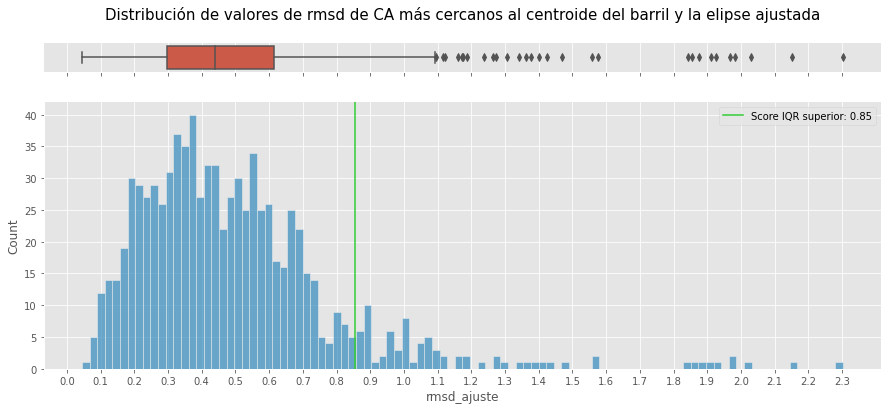

In [195]:
iqr_rmsd_ajuste = 0.5*(df_8['rmsd_ajuste'].quantile(0.75) - df_8['rmsd_ajuste'].quantile(0.25))
filtro_superior_rmsd_ajuste = df_8['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5)

with plt.style.context('ggplot'):
  fig,(ax_box,ax_hist) = plt.subplots(2,figsize=(15, 6),sharex=True,gridspec_kw={"height_ratios": (.10, .9)})
  sns.boxplot(df_8['rmsd_ajuste'], ax=ax_box)
  sns.histplot(df_8['rmsd_ajuste'], bins=100, ax=ax_hist, alpha=0.7)
  plt.axvline(filtro_superior_rmsd_ajuste, color='limegreen', label=f'Score IQR superior: {round(filtro_superior_rmsd_ajuste,2)}')
  ax_box.set(yticks=[])
  ax_box.set_xlabel(None)
  sns.despine(ax=ax_box, left=True)
  sns.despine(ax=ax_hist)
  ax_hist.set_xticks(np.arange(0,2.4,0.1))
  ax_box.set_title("Distribución de valores de rmsd de CA más cercanos al centroide del barril y la elipse ajustada\n", fontsize=15)
  plt.legend();

In [155]:
df_8['rmsd_ajuste'].min(), df_8['rmsd_ajuste'].max*

(0.0448860457728022, 2.3021941099359986)

In [198]:
#Segmentemos el rmsd_ajuste para graficarlo posteriormente
bins = [0,0.2,0.4,0.6,0.8,1,2.4]
names = ["0-0.2"," - 0.4"," - 0.6"," - 0.8"," - 1"," - 2.3"]
segmentos = pd.cut(df_8['rmsd_ajuste'], bins, labels = names)
df_8['cachito']=segmentos
Frecuencias = df_8['rmsd_ajuste'].groupby(segmentos).count()
Frecuencias

rmsd_ajuste
0-0.2      88
 - 0.4    280
 - 0.6    252
 - 0.8    128
 - 1       53
 - 2.3     44
Name: rmsd_ajuste, dtype: int64

### Excentricidad de barriles 8n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


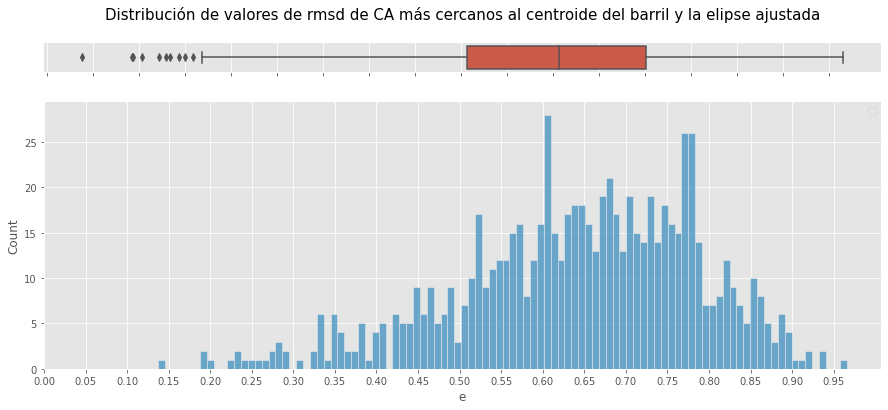

In [181]:
df_8_e= df_8.loc[df_8['rmsd_ajuste']<=df_8['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5), 'e']

with plt.style.context('ggplot'):
  fig,(ax_box,ax_hist) = plt.subplots(2,figsize=(15, 6),sharex=True,gridspec_kw={"height_ratios": (.10, .9)})
  sns.boxplot(df_8_e, ax=ax_box)
  sns.histplot(df_8_e, bins=100, ax=ax_hist, alpha=0.7)
  #plt.axvline(df_8['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5), color='limegreen', label='Score IQR superior')
  ax_box.set(yticks=[])
  ax_box.set_xlabel(None)
  sns.despine(ax=ax_box, left=True)
  sns.despine(ax=ax_hist)
  ax_hist.set_xticks(np.arange(0,1,0.05))
  ax_box.set_title("Distribución de valores de rmsd de CA más cercanos al centroide del barril y la elipse ajustada\n", fontsize=15)
  plt.legend();

In [122]:
print('Curtosis:', df_8_e.kurt())  #Aplanada
print('Asimetría:', df_8_e.skew()) #Negativa

Curtosis: 0.1717135256712159
Asimetría: -0.5914874176813333


### Area de barriles 8n

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


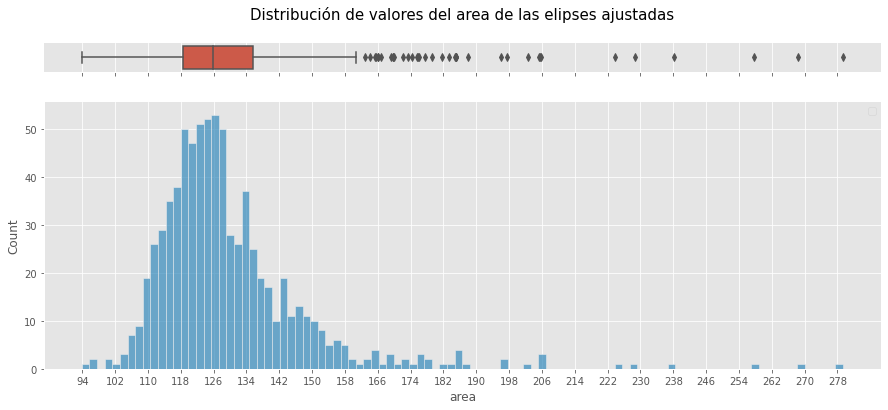

In [150]:
df_8_area= df_8.loc[df_8['rmsd_ajuste']<=df_8['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5), 'area']

with plt.style.context('ggplot'):
  fig,(ax_box,ax_hist) = plt.subplots(2,figsize=(15, 6),sharex=True,gridspec_kw={"height_ratios": (.10, .9)})
  sns.boxplot(df_8_area, ax=ax_box)
  sns.histplot(df_8_area, bins=100, ax=ax_hist, alpha=0.7)
  #plt.axvline(df_8['rmsd_ajuste'].quantile(0.75) + (iqr_rmsd_ajuste * 1.5), color='limegreen', label='Score IQR superior')
  ax_box.set(yticks=[])
  ax_box.set_xlabel(None)
  sns.despine(ax=ax_box, left=True)
  sns.despine(ax=ax_hist)
  ax_hist.set_xticks(np.arange(94,280,8))
  ax_box.set_title("Distribución de valores del area de las elipses ajustadas\n", fontsize=15)
  plt.legend();

In [128]:
print('Curtosis:', df_8_area.kurt())  #Afilada
print('Asimetría:', df_8_area.skew()) #Positiva

Curtosis: 14.17715973145427
Asimetría: 2.8817664720218295


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


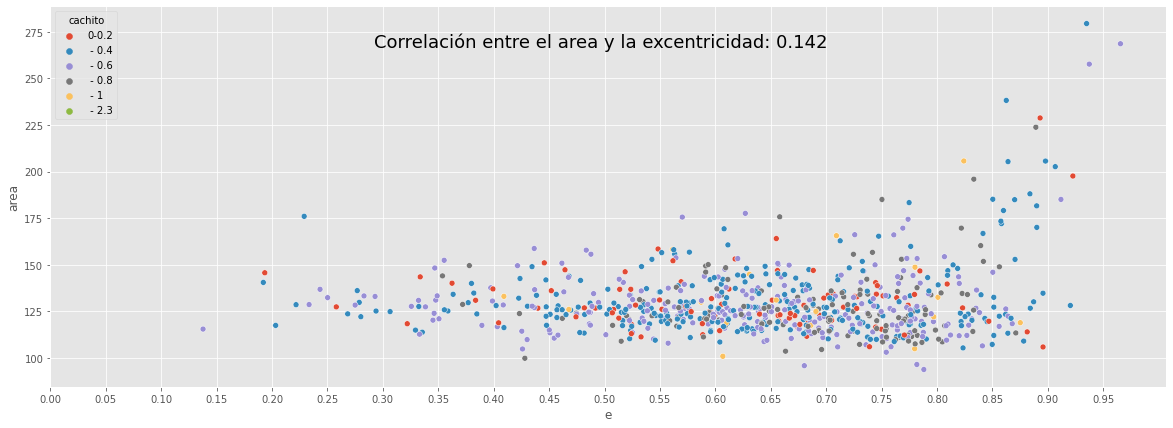

In [233]:
with plt.style.context('ggplot'):
  fig, ax = plt.subplots(figsize = (20, 7))
  sns.scatterplot(df_8_e,df_8_area,hue=df_8.cachito, s=35, marker="o")
  ax.set_xticks(np.arange(0,1,0.05))
  fig.text(0.35, 0.8,f'Correlación entre el area y la excentricidad: {round(df_8_e.corr(df_8_area),3)}', fontsize=18)

## Estudio de Superfamilias